## Target: To observe individual trends in variables and group them together and observe change in collinearity using extensive data pre processing approaches and comparing different algorithms in terms of their accuracy

### Covered:
    1.Extensive DPP
    2.Feature Scaling for LR
    3.Backward Feature Selection
    4.Introduction of Naive Bayes and KNN Algorithms
    5.Comparitive Study
    6.Export for frontend integration
    7.Observing trend on real time collected data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For data visualization 
import seaborn as sn  # For plotting graphs
%matplotlib inline
import warnings       # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# importing both train and test datasets
df = pd.read_csv('train1.csv')

In [3]:
# train data overview
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
#information of filtered data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          45211 non-null  int64  
 1   age         45202 non-null  float64
 2   job         45211 non-null  object 
 3   marital     45211 non-null  object 
 4   education   45211 non-null  object 
 5   default     45211 non-null  object 
 6   balance     45208 non-null  float64
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45211 non-null  object 
 12  duration    45211 non-null  int64  
 13  campaign    45211 non-null  int64  
 14  pdays       45211 non-null  int64  
 15  previous    45211 non-null  int64  
 16  poutcome    45211 non-null  object 
 17  subscribed  45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


1. **Categorical variables** in dataset: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **Continuous variables** in dataset: ID, age, balance, day, duration, campaign, pdays, previous

In [5]:
#checking columns for train and test datasets
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
#checking shape for train and test datasets
df.shape

(45211, 18)

In train dataset,
**independent variables** = 17 **target variable** = 1

*Analyzing our target variable, i.e. subscribed*

As it is a categorical in nature, we'll look at it's
   1. Frequency table
   2. Percentage distribution
   3. Bar plot

In [7]:
df['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: subscribed, Length: 45211, dtype: object

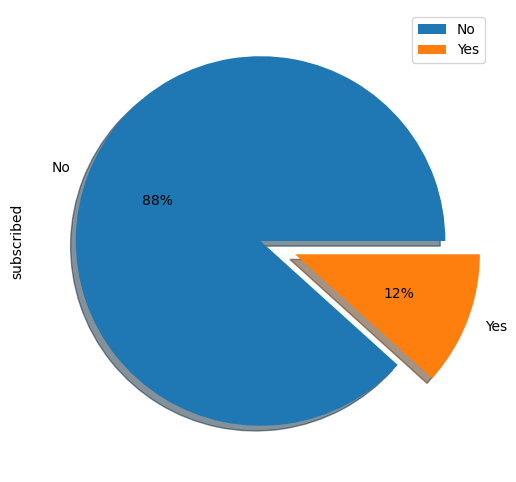

In [8]:
#Let's make a visualize about our target column
plt.figure(figsize=(12,6))
labels = ['No','Yes']
df['subscribed'].value_counts().plot.pie(shadow=True,
                                labels=labels,
                                autopct='%0.f%%',
                                explode = [0.0,0.2])
plt.legend()

In [9]:
df['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

In [10]:
# normalize = True to get proportions instead of number, and then converting to percentage.
df['subscribed'].value_counts(normalize=True) * 100

no     88.30152
yes    11.69848
Name: subscribed, dtype: float64

**3715** out of **31647** have subscribed ~ **12%.**

## DPP: Job ~ Extensive Processing

<Figure size 9600x6400 with 0 Axes>

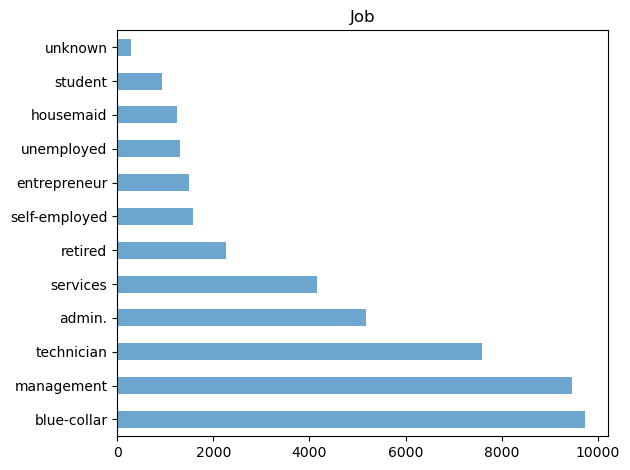

In [11]:
plt.figure(figsize=(6,4), dpi=1600)
fig,ax = plt.subplots()
df.job.value_counts().plot(kind='barh',alpha=.65)
plt.title('Job')
plt.tight_layout()
plt.show()

Most of the clients belongs to blue-collar job & Students are least in number.

In [12]:
df1=df.copy()

df1['subscribed'] = df1.subscribed.map({'yes':1, 'no':0})
df1['default'] = df1.default.map({'yes':1, 'no':0})
df1['housing'] = df1.housing.map({'yes':1, 'no':0})


In [13]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1001,999.0,management,married,tertiary,0,2143.0,1,no,unknown,5,may,261,1,-1,0,unknown,0
1,1002,44.0,technician,single,secondary,0,29.0,1,no,unknown,5,may,151,1,-1,0,unknown,0
2,1003,33.0,entrepreneur,married,secondary,0,2.0,1,yes,unknown,5,may,76,1,-1,0,unknown,0
3,1004,47.0,blue-collar,married,unknown,0,1506.0,1,no,unknown,5,may,92,1,-1,0,unknown,0
4,1005,33.0,unknown,single,unknown,0,1.0,0,no,unknown,5,may,198,1,-1,0,unknown,0


It seems to be the students are interested subscripe the deposit serve, while the blue-collar class are not, but looking to the actual numbers of contacted number of each class may give us more clear insight so we can dealing with this features to detirmine the importance of them.

In [14]:
#will work for df too
pd.crosstab(df1['job'],df1['subscribed'], margins=True, margins_name='Total').style.background_gradient(axis=None
                                                                                  , low=0.75, high=1.0)

subscribed,0,1,Total
job,,,
admin.,4540,631,5171
blue-collar,9024,708,9732
entrepreneur,1364,123,1487
housemaid,1131,109,1240
management,8157,1301,9458
retired,1748,516,2264
self-employed,1392,187,1579
services,3785,369,4154
student,669,269,938


In [15]:
df1[['job','subscribed']].groupby(['job'], as_index=True).mean().sort_values(
    by='subscribed',ascending=False).style.background_gradient(axis=None
                                        , low=0.75, high=1.0)

,subscribed
job,
student,0.286780
retired,0.227915
unemployed,0.155027
management,0.137556
admin.,0.122027
self-employed,0.118429
unknown,0.118056
technician,0.110570
services,0.088830


By looking to the actual number of each contacted class we can clearly see the huge gap between Student and Blue-collar classes. But we also can make the following decission, that the Blue-collar class are not interested joining the deposit. while other classes like Student, retried and manager are mor interesting to subscribe.

In [16]:
#division made based on percentage of subscribed ondividuals for each category
df1['job'] = df1.job.map({'management' : 6, 'technician' : 2, 'entrepreneur' : 1, 'blue-collar' : 1,
       'unknown' : 5, 'retired' : 8, 'admin.' : 3, 'services' : 1, 'self-employed' : 4,
       'unemployed' : 7, 'housemaid' : 1, 'student': 9}).astype(int)

In [17]:
df1.corr().job.subscribed

0.12148150685377615

## DPP: Marital ~ Numerical Conversion

Text(0.5, 1.0, 'Marital')

<Figure size 9600x4800 with 0 Axes>

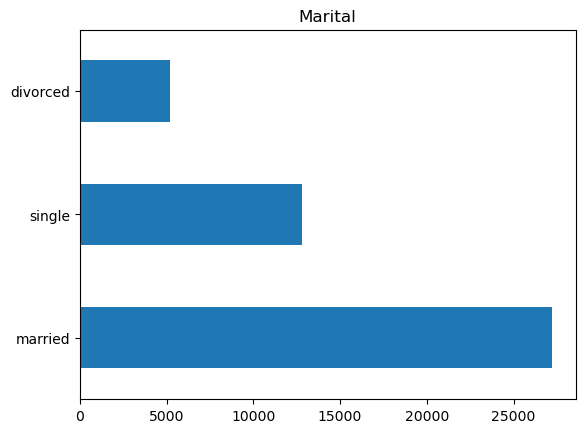

In [18]:
plt.figure(figsize=(6,3), dpi=1600)
fig,ax = plt.subplots()
df1['marital'].value_counts().plot(kind='barh')
plt.title('Marital')

Seems that the married and yes-said clients group is bigger than other groups, but we should take a look for the percent to make adecision.

In [19]:
pd.crosstab(df1['marital'], df1['subscribed'], margins=True).style.background_gradient(axis=None
                                                              , low=0.75, high=1.0)

subscribed,0,1,All
marital,,,
divorced,4585,622,5207
married,24459,2755,27214
single,10878,1912,12790
All,39922,5289,45211


In [20]:
df1[['marital', 'subscribed']].groupby('marital', as_index=False).mean().sort_values(by='subscribed', ascending=True).style.background_gradient(axis=None
                                                                                  , low=0.75, high=1.0)

,marital,subscribed
1,married,0.101235
0,divorced,0.119455
2,single,0.149492


After looking to the percent values we can make the following decision, the percent of yes-said groups in marital feature was quite same to each other.

In [21]:
df1['marital'] = df1.marital.map({'married' : 1, 'divorced' : 2, 'single' : 3}).astype(int)

In [22]:
df1.corr().marital.subscribed

0.06566840224451928

## DPP: Age ~ Extensive Processing

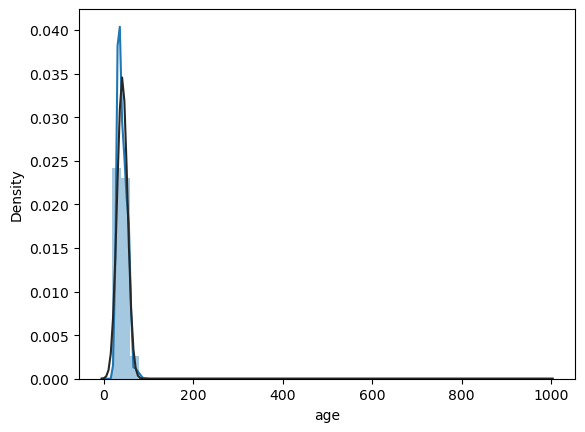

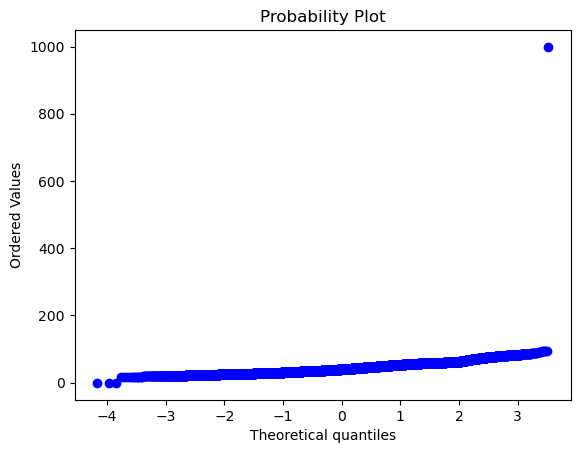

In [23]:
from scipy import stats
sns.distplot(df1['age'],fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df1['age'], plot=plt)

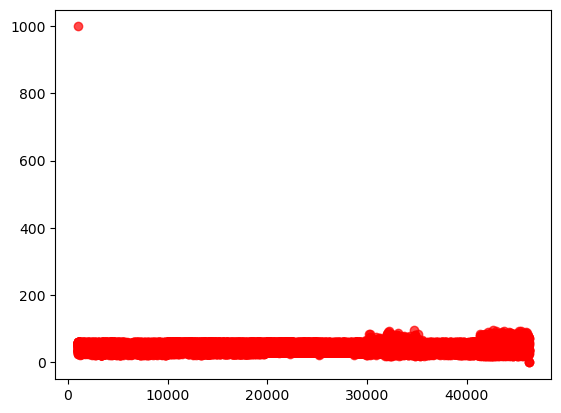

In [24]:
plt.scatter(x = df1['ID'], y = df1['age'], color='red', alpha=0.70)

In [25]:
df1['age'].nlargest(10)

0        999.0
33699     95.0
41663     95.0
31233     94.0
44262     93.0
44420     93.0
41934     92.0
42727     92.0
31069     90.0
43194     90.0
Name: age, dtype: float64

In [26]:
df1.corr().age.subscribed

0.02182784437819358

In [27]:
df1['Age_band'] = pd.cut(df['age'],4)
df1['Age_band']

0        (749.0, 999.0]
1         (-2.0, 249.0]
2         (-2.0, 249.0]
3         (-2.0, 249.0]
4         (-2.0, 249.0]
              ...      
45206     (-2.0, 249.0]
45207     (-2.0, 249.0]
45208     (-2.0, 249.0]
45209     (-2.0, 249.0]
45210     (-2.0, 249.0]
Name: Age_band, Length: 45211, dtype: category
Categories (4, interval[float64, right]): [(-2.0, 249.0] < (249.0, 499.0] < (499.0, 749.0] < (749.0, 999.0]]

In [28]:
df1[['Age_band','subscribed']].groupby(['Age_band'], as_index=False).mean().sort_values(by='Age_band', ascending=True)

,Age_band,subscribed
0,"(-2.0, 249.0]",0.117011
1,"(249.0, 499.0]",NaN
2,"(499.0, 749.0]",NaN
3,"(749.0, 999.0]",0.000000


The density of first and second group is quite the same, so I'm going to merge them in one group.

In [29]:
for col in [df1]:
  col.loc[ col['age'] <= 17, 'age'] = 0
  col.loc[ (col['age'] > 17) & (col['age'] <= 60), 'age'] = 1
  col.loc[ (col['age'] > 60) & (col['age'] <= 75), 'age'] = 2
  col.loc[ (col['age'] > 75) , 'age'] = 3

In [30]:
df1.corr().age.subscribed

0.1484266991073323

In [31]:
df1.drop(['Age_band'], axis=1, inplace=True)

In [32]:
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1001,3.0,6,1,tertiary,0,2143.0,1,no,unknown,5,may,261,1,-1,0,unknown,0
1,1002,1.0,2,3,secondary,0,29.0,1,no,unknown,5,may,151,1,-1,0,unknown,0
2,1003,1.0,1,1,secondary,0,2.0,1,yes,unknown,5,may,76,1,-1,0,unknown,0
3,1004,1.0,1,1,unknown,0,1506.0,1,no,unknown,5,may,92,1,-1,0,unknown,0
4,1005,1.0,5,3,unknown,0,1.0,0,no,unknown,5,may,198,1,-1,0,unknown,0


## DPP: Month ~ Extensive Processing

<Axes: xlabel='month', ylabel='count'>

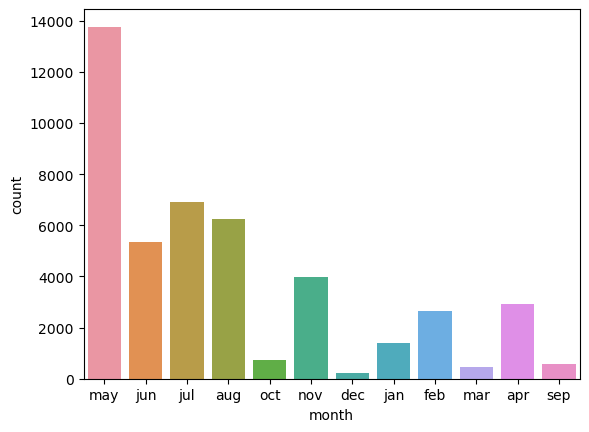

In [33]:
sns.countplot(x='month', data=df1)

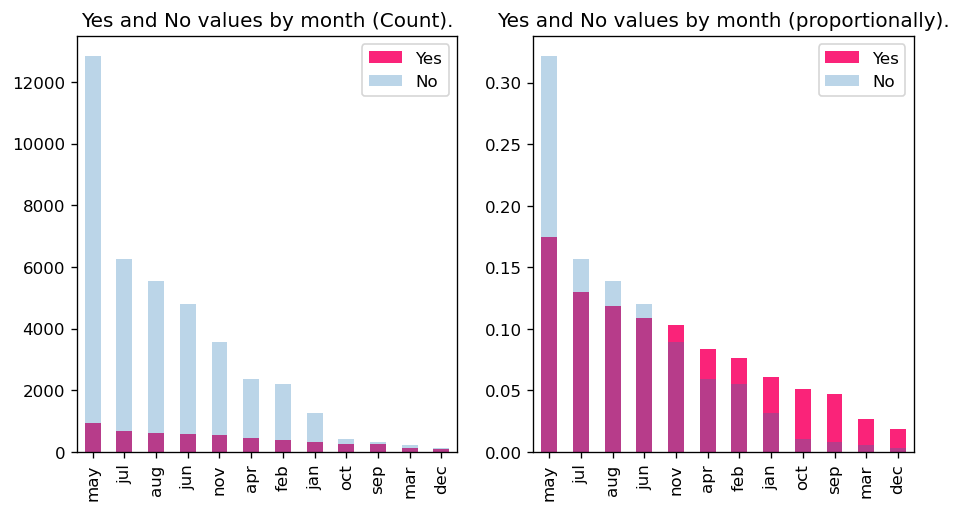

In [34]:
fig = plt.figure(figsize=(9,4.5), dpi =120)
ax1 = fig.add_subplot(121)
(df1.month[df1.subscribed == 1].value_counts()).plot(kind='bar', color='#FA2379',alpha=1, label='Yes')
(df1.month[df1.subscribed == 0].value_counts()).plot(kind='bar',alpha=.3, label='No')
plt.title("Yes and No values by month (Count).")
plt.legend(loc='best')

ax2 = fig.add_subplot(122)
(df1.month[df1.subscribed == 1].value_counts()/float(df1.subscribed[df1.subscribed == 1].size)).plot(kind='bar', color='#FA2379',alpha=1, label='Yes')
(df1.month[df1.subscribed == 0].value_counts()/float(df1.subscribed[df1.subscribed == 0].size)).plot(kind='bar',alpha=.3, label='No')
plt.title("Yes and No values by month (proportionally).")
plt.legend(loc='best')

In [35]:
pd.crosstab(df1['month'], df1['subscribed'], margins=True).style.background_gradient(axis=None, low=0.75, high=1.0)

subscribed,0,1,All
month,,,
apr,2355,577,2932
aug,5559,688,6247
dec,114,100,214
feb,2208,441,2649
jan,1261,142,1403
jul,6268,627,6895
jun,4795,546,5341
mar,229,248,477
may,12841,925,13766


In [36]:
df1[['month', 'subscribed']].groupby(['month'], as_index=False).mean().sort_values(by='subscribed',ascending=False)

,month,subscribed
7,mar,0.519916
2,dec,0.467290
11,sep,0.464594
10,oct,0.437669
0,apr,0.196794
3,feb,0.166478
1,aug,0.110133
6,jun,0.102228
9,nov,0.101511
4,jan,0.101212


In [37]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [38]:
df1['month'] = df.month.map({'may': 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'oct' : 10, 'nov' : 11, 'dec' : 12, 'jan' : 1, 'feb' : 2,
      'mar' : 3, 'apr' : 4, 'sep' : 9}).astype(int)

In [39]:
df1.corr().month.subscribed

0.01871703722790093

In [40]:
df1['month']=df1['month'].replace(11,1)
df1['month']=df1['month'].replace(7,1)
df1['month']=df1['month'].replace(5,1)
df1['month']=df1['month'].replace(6,1)
df1['month'].value_counts()

1     31375
8      6247
4      2932
2      2649
10      738
9       579
3       477
12      214
Name: month, dtype: int64

In [41]:
df1.corr().month.subscribed

0.13519254808496903

In [42]:
df1[['month', 'subscribed']].groupby(['month'], as_index=False).mean().sort_values(by='subscribed',ascending=False)

,month,subscribed
2,3,0.519916
7,12,0.467290
5,9,0.464594
6,10,0.437669
3,4,0.196794
1,2,0.166478
4,8,0.110133
0,1,0.084239


## DPP: Balance ~ Extensive Processing

In [43]:
df1['balance'].describe()

count     45208.000000
mean       1362.346620
std        3044.852387
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='balance'>

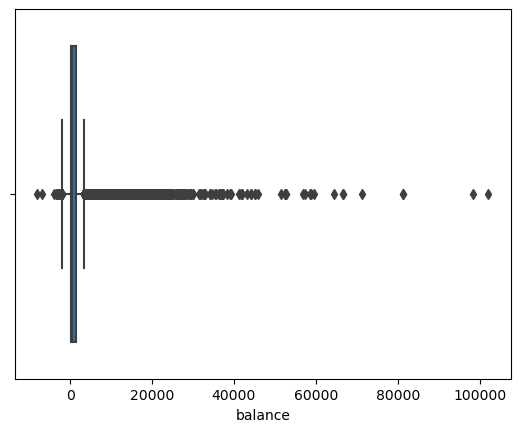

In [44]:
sns.boxplot(x=df1["balance"])

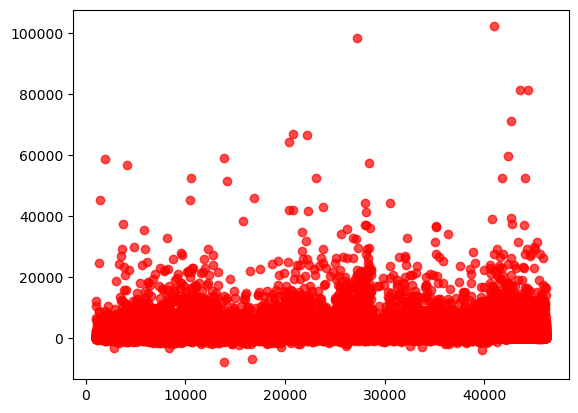

In [45]:
plt.scatter(x = df1['ID'], y = df1['balance'], color='red', alpha=0.70)

In [46]:
balance = df['balance']
count = balance[balance >= 3642].count()
count

4429

In [47]:
count = balance[balance <= -1962].count()
count

17

<Axes: xlabel='subscribed', ylabel='balance'>

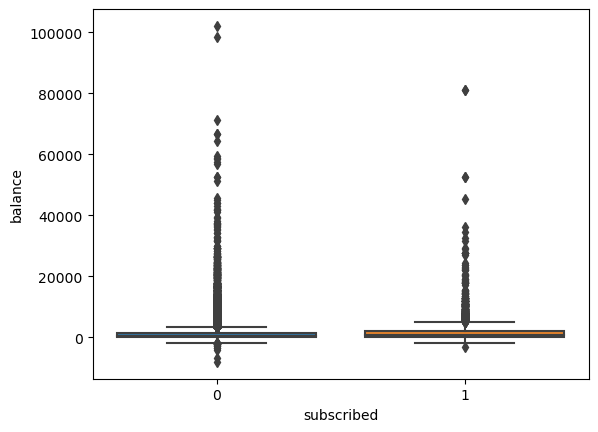

In [48]:
sns.boxplot(data=df1, x="subscribed", y="balance")

In [49]:
df1.corr().balance.subscribed

0.05282997998911638

In [50]:
# checking quantiles
q1 = df1['balance'].quantile(0.25)
q3 = df1['balance'].quantile(0.75)
q1, q3

(72.0, 1428.0)

In [51]:
#calculating iqr(inter quantile range)
iqr = q3 - q1
iqr

1356.0

In [52]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(3462.0, -1962.0)

In [53]:
if(upper_limit > (df1['balance'].max())):
    upper_limit = df1['balance'].max()
if(lower_limit < (df1['balance'].min())):
    lower_limit = df1['balance'].min()

In [54]:
upper_limit, lower_limit

(3462.0, -1962.0)

In [55]:
# treating outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [56]:
df1['balance'] = df1['balance'].apply(limit_imputer)

In [57]:
df1['balance'].describe()

count    45208.000000
mean       933.753097
std       1176.788956
min      -1962.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max       3462.000000
Name: balance, dtype: float64

<Axes: xlabel='balance'>

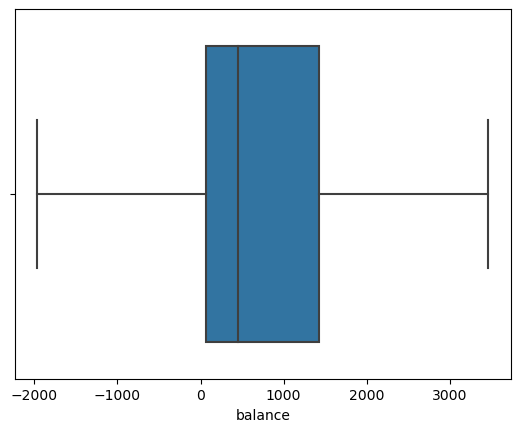

In [58]:
sns.boxplot(x=df1["balance"])

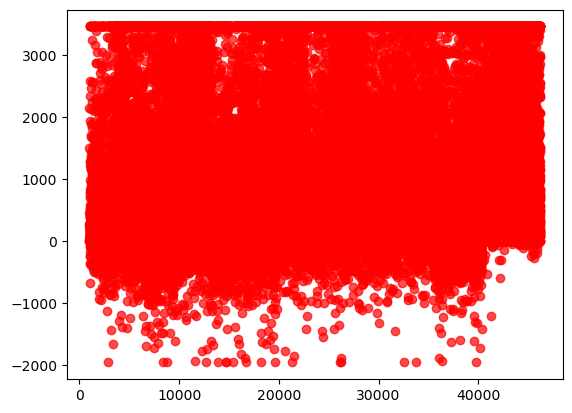

In [59]:
plt.scatter(x = df1['ID'], y = df1['balance'], color='red', alpha=0.70)

<Axes: xlabel='subscribed', ylabel='balance'>

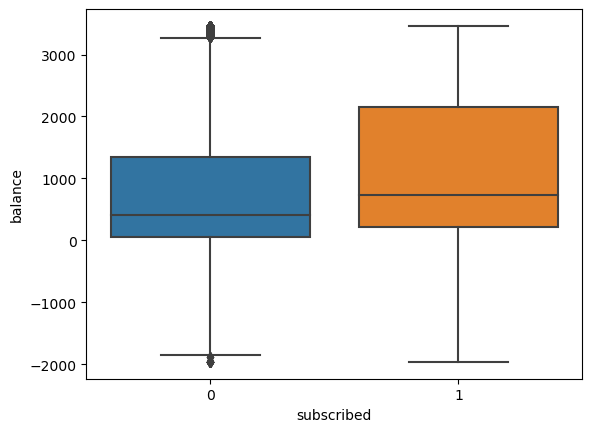

In [60]:
sns.boxplot(data=df1, x="subscribed", y="balance")

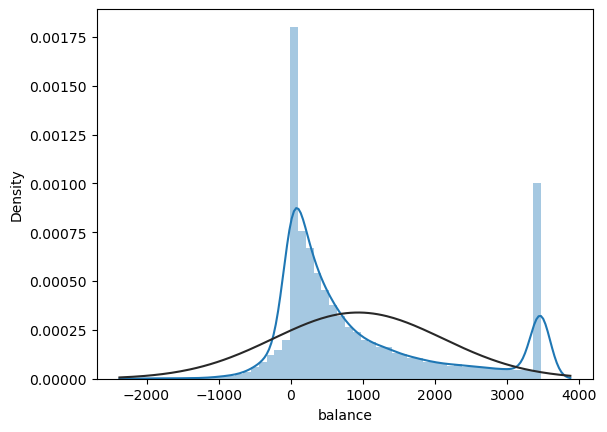

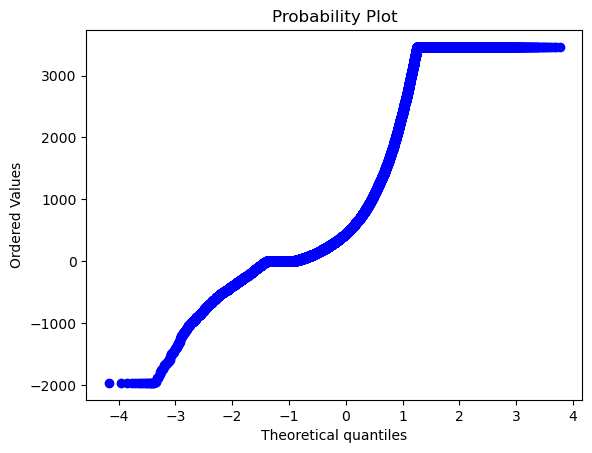

In [61]:
from scipy import stats
sns.distplot(df1['balance'],fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df1['balance'], plot=plt)

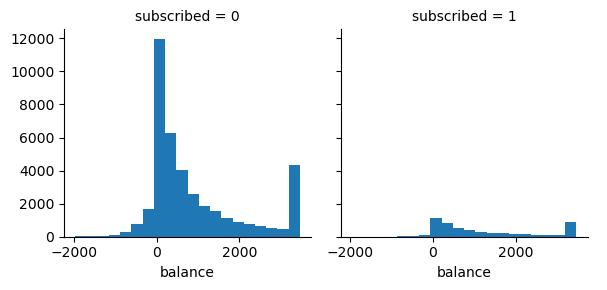

In [62]:
g = sns.FacetGrid(df1, col='subscribed')
g.map(plt.hist, 'balance', bins=20)
g.add_legend()

In [63]:
df1.corr().balance.subscribed

0.09291099173982677

In [64]:
df1['balance_band'] = pd.cut(df1['balance'],6)
df1['balance_band']

0        (1654.0, 2558.0]
1         (-154.0, 750.0]
2         (-154.0, 750.0]
3         (750.0, 1654.0]
4         (-154.0, 750.0]
               ...       
45206     (750.0, 1654.0]
45207    (1654.0, 2558.0]
45208    (2558.0, 3462.0]
45209     (-154.0, 750.0]
45210    (2558.0, 3462.0]
Name: balance_band, Length: 45211, dtype: category
Categories (6, interval[float64, right]): [(-1967.424, -1058.0] < (-1058.0, -154.0] < (-154.0, 750.0] < (750.0, 1654.0] < (1654.0, 2558.0] < (2558.0, 3462.0]]

In [65]:
df1[['balance_band','subscribed']].groupby(['balance_band'], as_index=False).mean().sort_values(by='balance_band', ascending=True)

,balance_band,subscribed
0,"(-1967.424, -1058.0]",0.033058
1,"(-1058.0, -154.0]",0.057811
2,"(-154.0, 750.0]",0.099323
3,"(750.0, 1654.0]",0.134135
4,"(1654.0, 2558.0]",0.157784
5,"(2558.0, 3462.0]",0.166294


In [66]:
for col in [df1]:
  col.loc[ col['balance'] <= 0, 'balance'] = 0
  col.loc[ (col['balance'] > 0) & (col['balance'] <= 750), 'balance'] = 1
  col.loc[ (col['balance'] > 750) & (col['balance'] <= 1650), 'balance'] = 2
  col.loc[ (col['balance'] > 1650) & (col['balance'] <= 3500), 'balance'] = 3

In [67]:
df1.corr().balance.subscribed

0.09617230994386147

In [68]:
df1.drop(['balance_band'], axis=1, inplace=True)

In [69]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1001,3.0,6,1,tertiary,0,3.0,1,no,unknown,5,1,261,1,-1,0,unknown,0
1,1002,1.0,2,3,secondary,0,1.0,1,no,unknown,5,1,151,1,-1,0,unknown,0
2,1003,1.0,1,1,secondary,0,1.0,1,yes,unknown,5,1,76,1,-1,0,unknown,0
3,1004,1.0,1,1,unknown,0,2.0,1,no,unknown,5,1,92,1,-1,0,unknown,0
4,1005,1.0,5,3,unknown,0,1.0,0,no,unknown,5,1,198,1,-1,0,unknown,0


## DPP: Duration ~ Normal Processing

In [70]:
df1['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: xlabel='duration'>

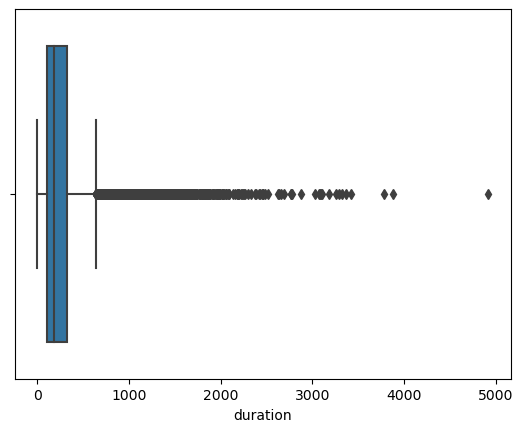

In [71]:
sns.boxplot(x=df1["duration"])

<Axes: xlabel='subscribed', ylabel='duration'>

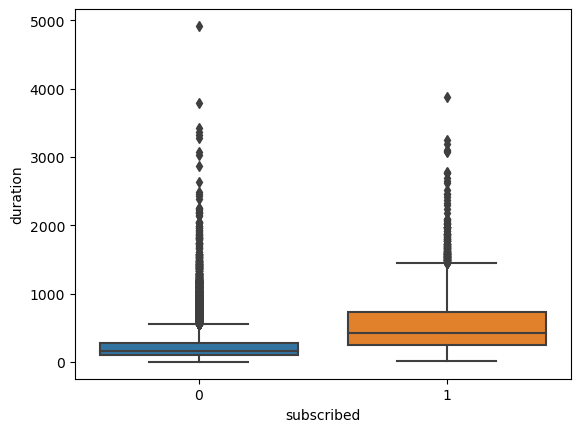

In [72]:
sns.boxplot(data=df1, x="subscribed", y="duration")

In [73]:
df1.corr().duration.subscribed

0.3945210158945639

In [74]:
# checking quantiles
q1 = df1['duration'].quantile(0.25)
q3 = df1['duration'].quantile(0.75)
q1, q3

(103.0, 319.0)

In [75]:
#calculating iqr(inter quantile range)
iqr = q3 - q1
iqr

216.0

In [76]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(643.0, -221.0)

In [77]:
if(upper_limit > (df1['duration'].max())):
    upper_limit = df1['duration'].max()
if(lower_limit < (df1['duration'].min())):
    lower_limit = df1['duration'].min()


In [78]:
upper_limit, lower_limit

(643.0, 0)

In [79]:
# treating outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [80]:
df1['duration'] = df1['duration'].apply(limit_imputer)

In [81]:
df1['duration'].describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: duration, dtype: float64

<Axes: xlabel='duration'>

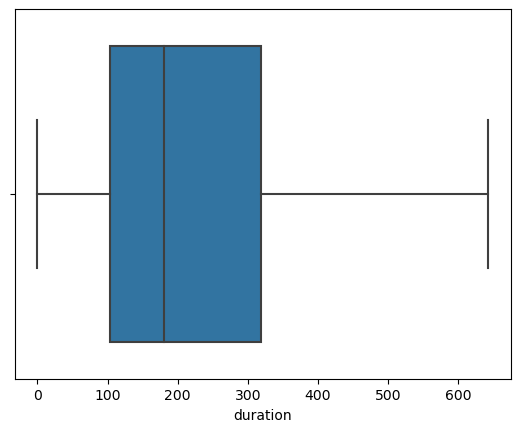

In [82]:
sns.boxplot(x=df1["duration"])

<Axes: xlabel='subscribed', ylabel='duration'>

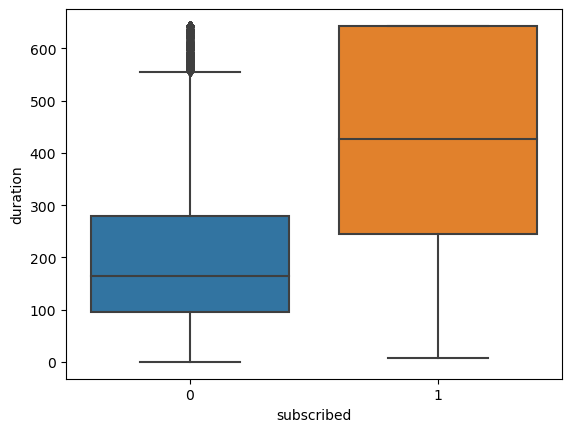

In [83]:
sns.boxplot(data=df1, x="subscribed", y="duration")

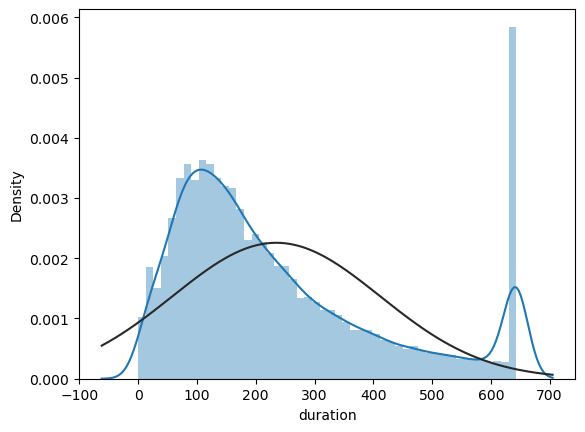

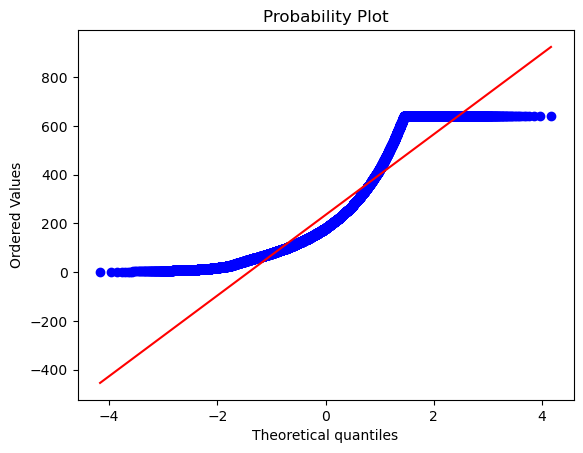

In [84]:
from scipy import stats
sns.distplot(df1['duration'],fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df1['duration'], plot=plt)

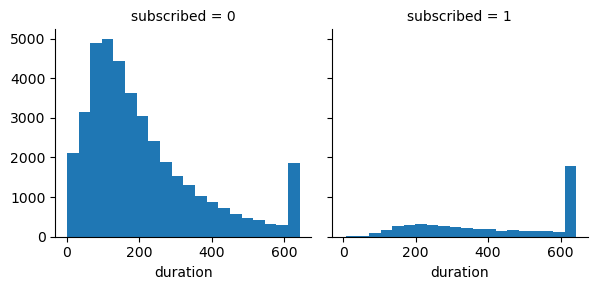

In [85]:
g = sns.FacetGrid(df1, col='subscribed')
g.map(plt.hist, 'duration', bins=20)
g.add_legend()

In [86]:
df1['duration'].nlargest(10)

37     643.0
43     643.0
53     643.0
59     643.0
61     643.0
83     643.0
86     643.0
87     643.0
109    643.0
130    643.0
Name: duration, dtype: float64

In [87]:
df1.corr().duration.subscribed

0.39065850658485973

In [88]:
df1['education'] = df1.education.map({'secondary' : 1, 'tertiary' : 2, 'primary' : 3, 'unknown' : 4}).astype(int)
df1['loan'] = df1.loan.map({'no' : 2, 'yes' : 1}).astype(int)
df1['contact'] = df1.contact.map({'cellular' : 3, 'unknown' : 2, 'telephone' : 1}).astype(int)
df1['poutcome'] = df1.poutcome.map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success' : 4}).astype(int)

## Upgraded Heatmap

<Axes: >

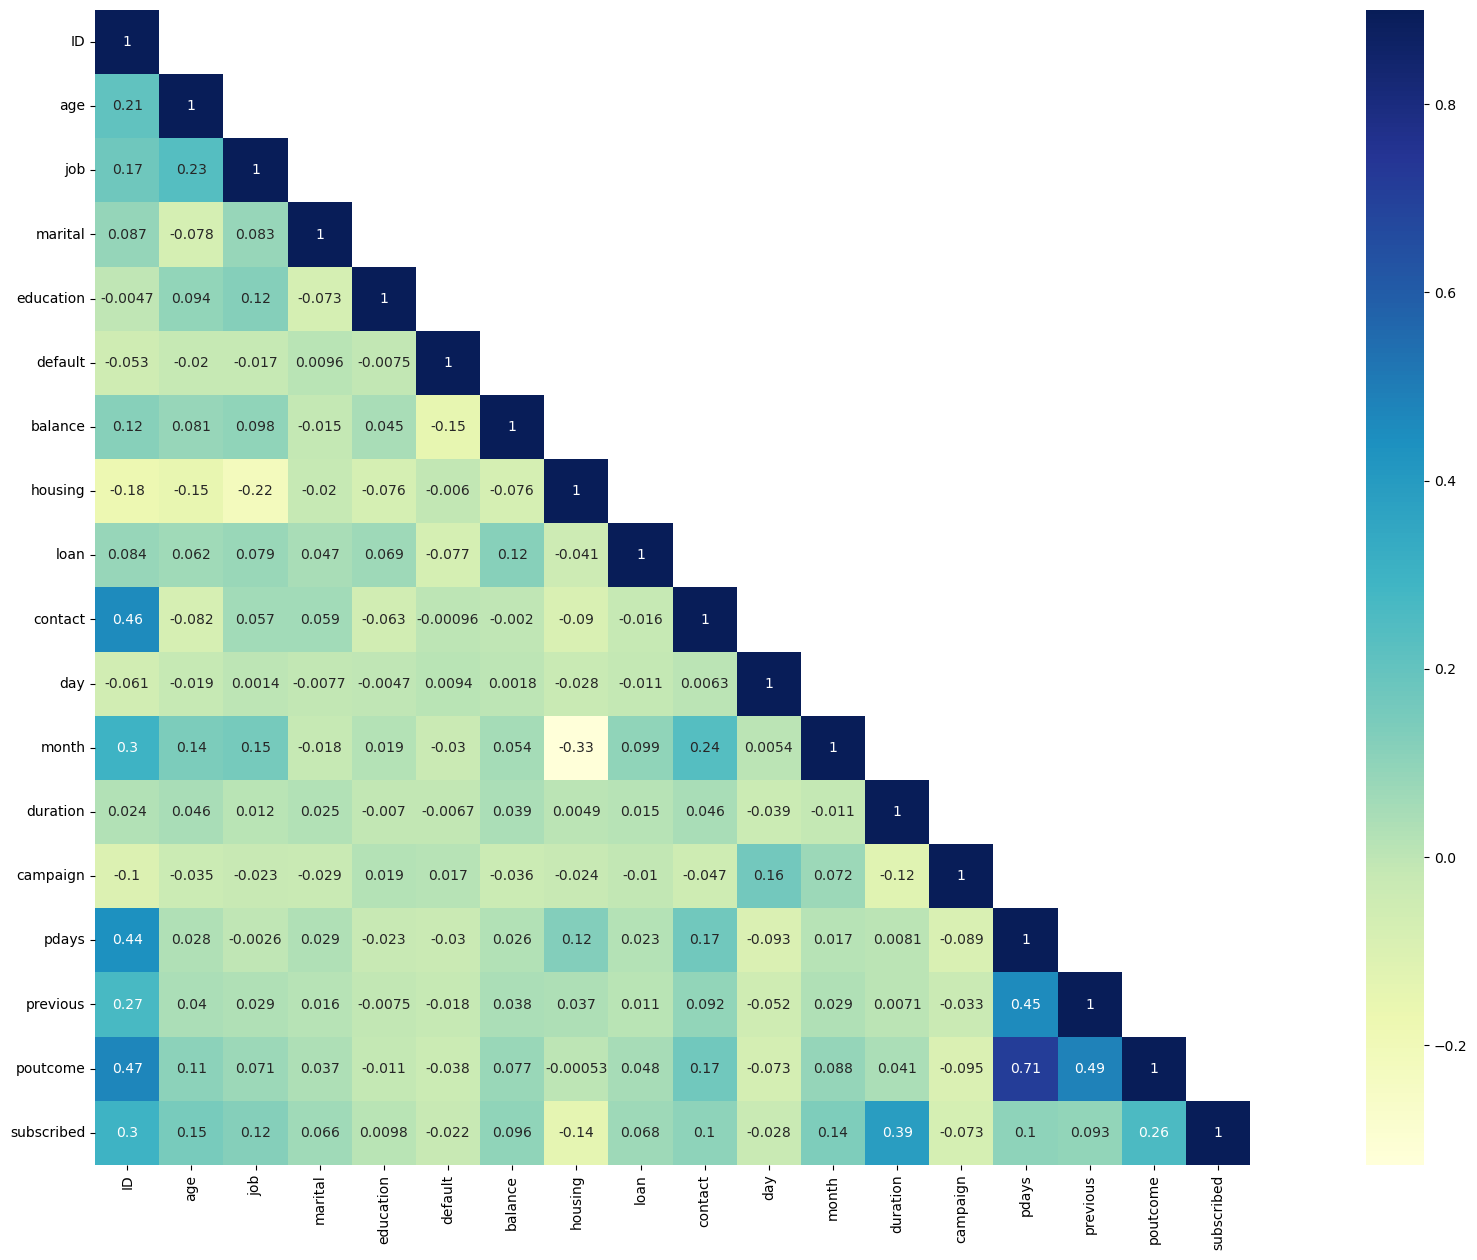

In [89]:
#getting a correlation dataframe
corr = df1.corr()
#converting it to numpy-array
mask = np.array(corr)
#removing the lower triangle of the np-array, tril_indices_from() returns the indices for the lower-triangle of arr.
mask[np.tril_indices_from(mask)] = False
#Create a figure and a set of subplots.
fig,ax= plt.subplots()
#setting figure size
fig.set_size_inches(30,15)
#forming the heatmap
sn.heatmap(corr, mask=mask, vmax=.9, square=True, annot=True, cmap="YlGnBu")

In [90]:
corr['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.390659
ID            0.296287
poutcome      0.259315
age           0.148427
month         0.135193
job           0.121482
pdays         0.103621
contact       0.100822
balance       0.096172
previous      0.093236
loan          0.068185
marital       0.065668
education     0.009795
default      -0.022419
day          -0.028348
campaign     -0.073172
housing      -0.139173
Name: subscribed, dtype: float64

In [91]:
df1.dropna(inplace=True)

In [92]:
target = df1['subscribed']

train = df1.drop('subscribed',1)
train = train.drop('ID',1)
train = train.drop('marital',1)
train = train.drop('loan',1)
train = train.drop('day',1)
train = train.drop('education',1)
train = train.drop('contact',1)
train = train.drop('pdays',1)
train = train.drop('campaign',1)
train = train.drop('previous',1)

In [93]:
# applying dummies on train dataset
train = pd.get_dummies(train)
train.shape

(45200, 8)

In [94]:
train['age'] = train['age'].astype(int)
train['balance'] = train['balance'].astype(int)
train['duration'] = train['duration'].astype(int)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45200 non-null  int32
 1   job       45200 non-null  int32
 2   default   45200 non-null  int64
 3   balance   45200 non-null  int32
 4   housing   45200 non-null  int64
 5   month     45200 non-null  int32
 6   duration  45200 non-null  int32
 7   poutcome  45200 non-null  int32
dtypes: int32(6), int64(2)
memory usage: 2.1 MB


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# splitting into train and validation with 20% of the data as a validation set and the remainder as a training set..
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=12)
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
#norm = MinMaxScaler().fit(x_train)
#x_train= norm.transform(x_train)
#x_test = norm.transform(x_test) 

## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train,y_train)
lr_pred = lreg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred)

0.8970132743362832

In [99]:
lr_pred1 = lreg.predict(x_train)
accuracy_score(y_train, lr_pred1)

0.8920630530973451

In [100]:
print('Training set score: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
print('Test set score: {:.2f}'.format(accuracy_score(y_train, lr_pred1)))

Training set score: 0.90
Test set score: 0.89


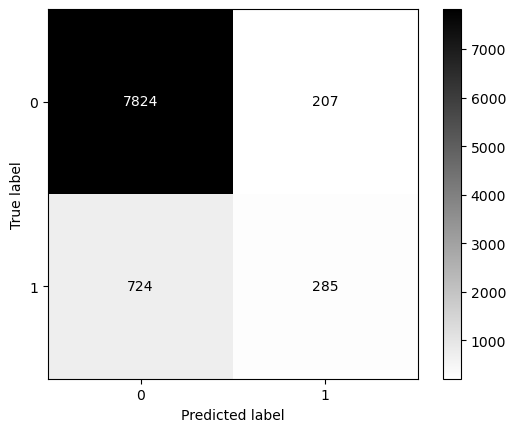

In [101]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, lr_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap='binary')
plt.show()

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8031
           1       0.58      0.28      0.38      1009

    accuracy                           0.90      9040
   macro avg       0.75      0.63      0.66      9040
weighted avg       0.88      0.90      0.88      9040



### Testing on Real-Time Dataset

In [103]:
newtest = pd.read_csv('target2.csv')
newtrain = pd.read_csv('train2.csv')

In [104]:
lr_pred_realtime = lreg.predict(newtrain)
accuracy_score(newtest, lr_pred_realtime)

0.9336283185840708

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(lreg, train, target, cv=10)

array([0.88827434, 0.92632743, 0.90730088, 0.8619469 , 0.87323009,
       0.84823009, 0.85641593, 0.87765487, 0.89756637, 0.83827434])

## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
dtree.fit(x_train, y_train)
dt_pred = dtree.predict(x_test)
accuracy_score(y_test, dt_pred)

0.9033185840707965

In [107]:
dt_pred1 = dtree.predict(x_train)
accuracy_score(y_train, dt_pred1)

0.9004701327433628

In [108]:
print('Train set score: {:.2f}'.format(dtree.score(x_train, y_train)))
print('Test set score: {:.2f}'.format(dtree.score(x_test, y_test)))

Train set score: 0.90
Test set score: 0.90


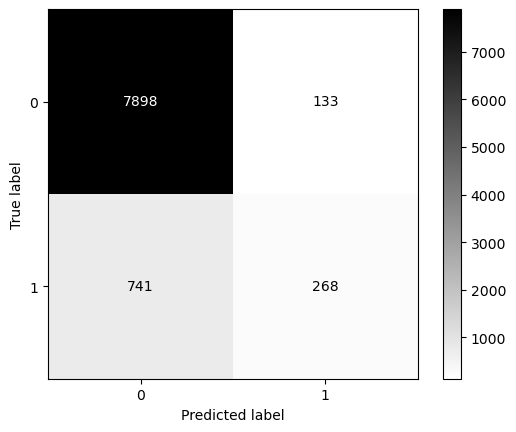

In [109]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap='binary')
plt.show()

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8031
           1       0.67      0.27      0.38      1009

    accuracy                           0.90      9040
   macro avg       0.79      0.62      0.66      9040
weighted avg       0.89      0.90      0.88      9040



### Testing on Real-Time Dataset

In [150]:
dtree_realtime = dtree.predict(newtrain)
accuracy_score(newtest, dtree_realtime)

0.9601769911504425

In [111]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, train, target, cv=7)

array([0.88278105, 0.88663466, 0.84900108, 0.81911104, 0.87920087,
       0.85813845, 0.77048165])

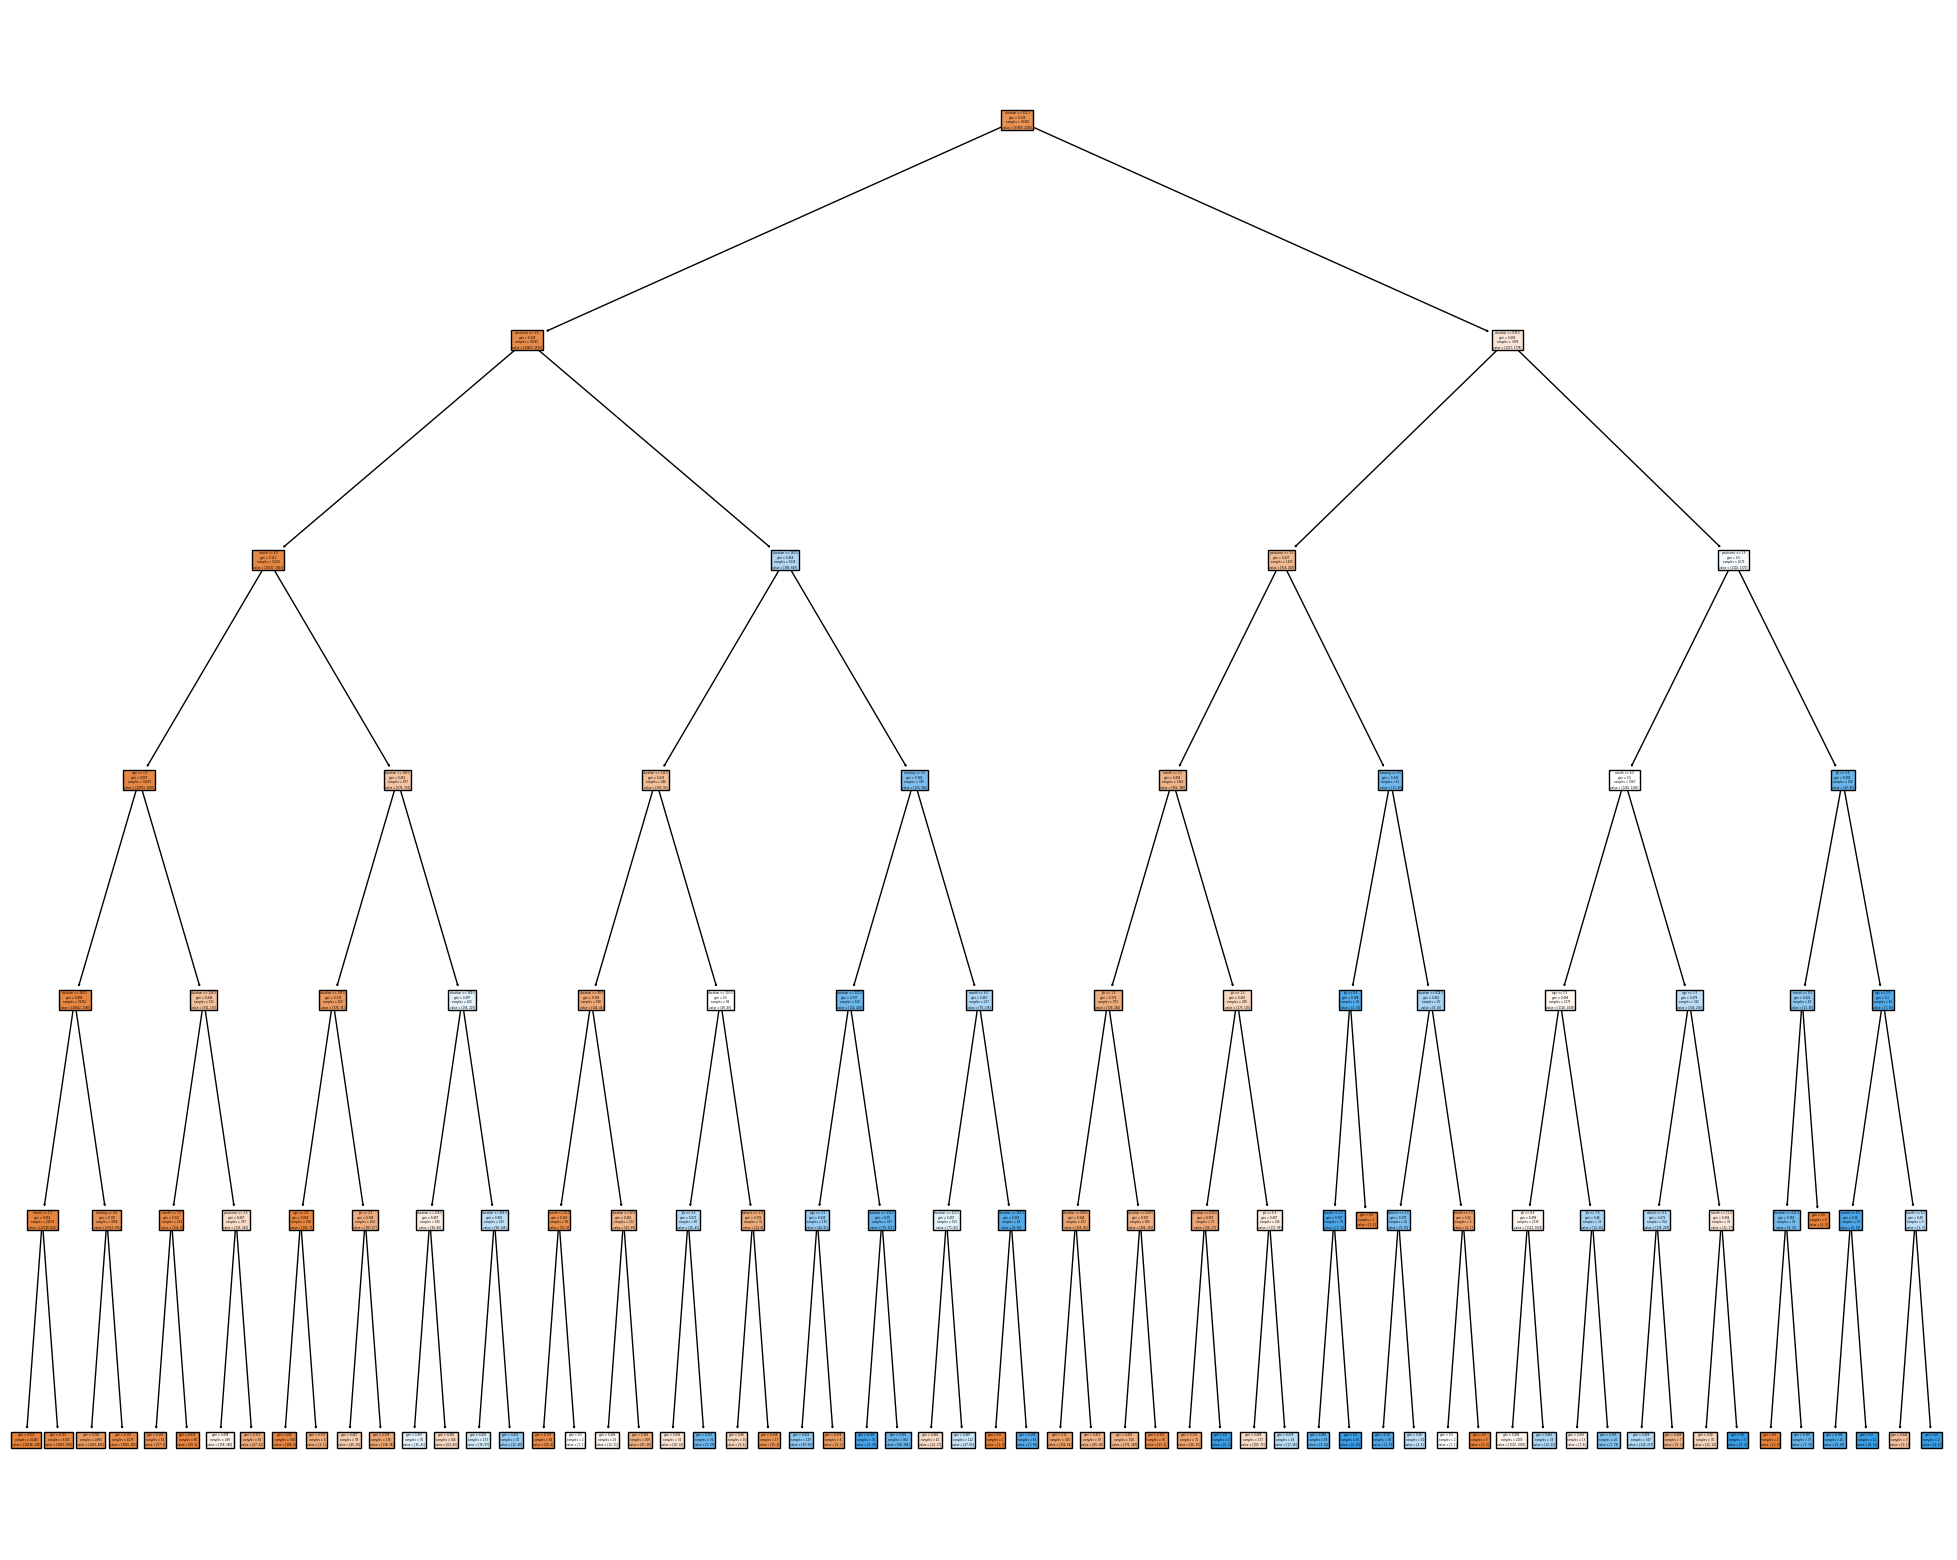

In [112]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names=train.columns,  
                   filled=True)
plt.savefig('out.pdf')

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=6, random_state=0, max_features=6, max_depth=6)
rfc.fit(x_train, y_train)
rf_pred = rfc.predict(x_test)
accuracy_score(y_test, rf_pred)

0.9051991150442478

In [114]:
rfc.fit(x_train, y_train)
rf_pred1 = rfc.predict(x_train)
accuracy_score(y_train, rf_pred1)

0.9011615044247787

In [115]:
print('Test set score: {:.2f}'.format(accuracy_score(y_test, rf_pred)))
print('Train set score: {:.2f}'.format(accuracy_score(y_train, rf_pred1)))

Test set score: 0.91
Train set score: 0.90


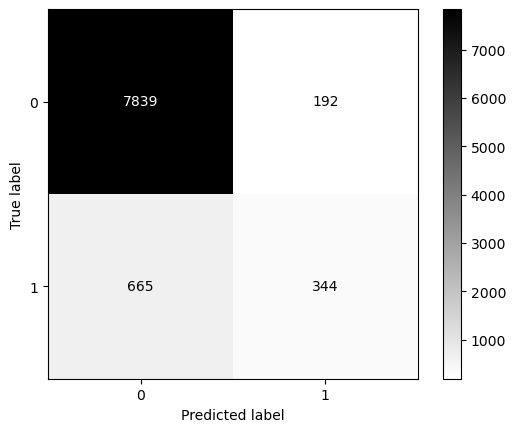

In [116]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap='binary')
plt.show()

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8031
           1       0.64      0.34      0.45      1009

    accuracy                           0.91      9040
   macro avg       0.78      0.66      0.70      9040
weighted avg       0.89      0.91      0.89      9040



### Testing on Real-Time Dataset

In [151]:
rfc_realtime = rfc.predict(newtrain)
accuracy_score(newtest, rfc_realtime)

0.9535398230088495

In [118]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, train, target, cv=7)

array([0.88293589, 0.88709927, 0.84931083, 0.7686232 , 0.88105932,
       0.76614527, 0.76165402])

## KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn_pred=knn.predict(x_test)
accuracy_score(y_test, knn_pred)

0.8894911504424778

In [120]:
knn_pred1 = knn.predict(x_train)
accuracy_score(y_train, knn_pred1)

0.8998340707964602

In [121]:
print('Test set score: {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('Train set score: {:.2f}'.format(accuracy_score(y_train, knn_pred1)))

Test set score: 0.89
Train set score: 0.90


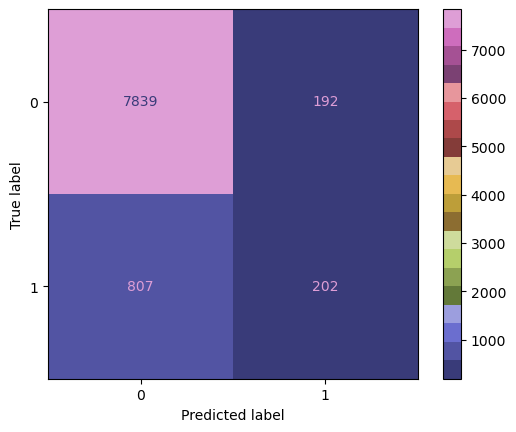

In [122]:
confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap='tab20b')
plt.show()

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8031
           1       0.51      0.20      0.29      1009

    accuracy                           0.89      9040
   macro avg       0.71      0.59      0.61      9040
weighted avg       0.86      0.89      0.87      9040



### Testing on Real-Time Dataset

In [152]:
knn_realtime = knn.predict(newtrain)
accuracy_score(newtest, knn_realtime)

0.9557522123893806

In [124]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, train, target, cv=7)

array([0.88309074, 0.88555057, 0.87362552, 0.7083785 , 0.87827164,
       0.82484126, 0.86201022])

## Naive Bayes 

In [125]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)
nb_pred = classifier.predict(x_test)
accuracy_score(y_test, nb_pred)

0.8868362831858407

In [126]:
classifier.fit(x_train, y_train)
nb_pred1 = classifier.predict(x_train)
accuracy_score(y_train, nb_pred1)

0.8814988938053098

In [127]:
print('Test set score: {:.2f}'.format(accuracy_score(y_test, nb_pred)))
print('Train set score: {:.2f}'.format(accuracy_score(y_train, nb_pred1)))

Test set score: 0.89
Train set score: 0.88


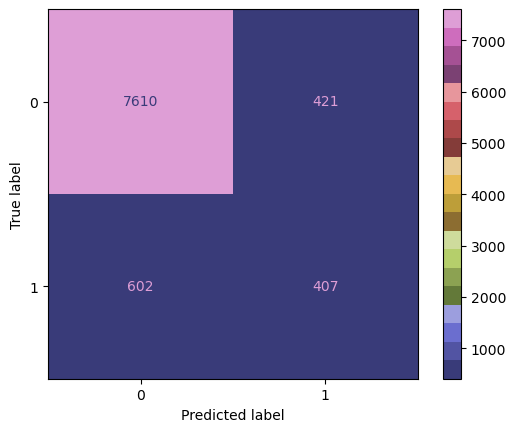

In [128]:
confusion_matrix = metrics.confusion_matrix(y_test, nb_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot(cmap='tab20b')
plt.show()

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8031
           1       0.49      0.40      0.44      1009

    accuracy                           0.89      9040
   macro avg       0.71      0.68      0.69      9040
weighted avg       0.88      0.89      0.88      9040



### Testing on Real-Time Dataset

In [153]:
nb_realtime = classifier.predict(newtrain)
accuracy_score(newtest, nb_realtime)

0.8185840707964602

In [130]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, train, target, cv=10)

array([0.88561947, 0.91681416, 0.90730088, 0.90376106, 0.88030973,
       0.86084071, 0.89336283, 0.8789823 , 0.89690265, 0.68628319])

In [131]:
'''import numpy
data = numpy.array([[2, 3.0, 6, 1, 2, 0, 3.0, 1, 2, 5, 1, 261.0, 1, 1]])
prediction = clf_gini.predict(data)
print(prediction)
'''

'import numpy\ndata = numpy.array([[2, 3.0, 6, 1, 2, 0, 3.0, 1, 2, 5, 1, 261.0, 1, 1]])\nprediction = clf_gini.predict(data)\nprint(prediction)\n'

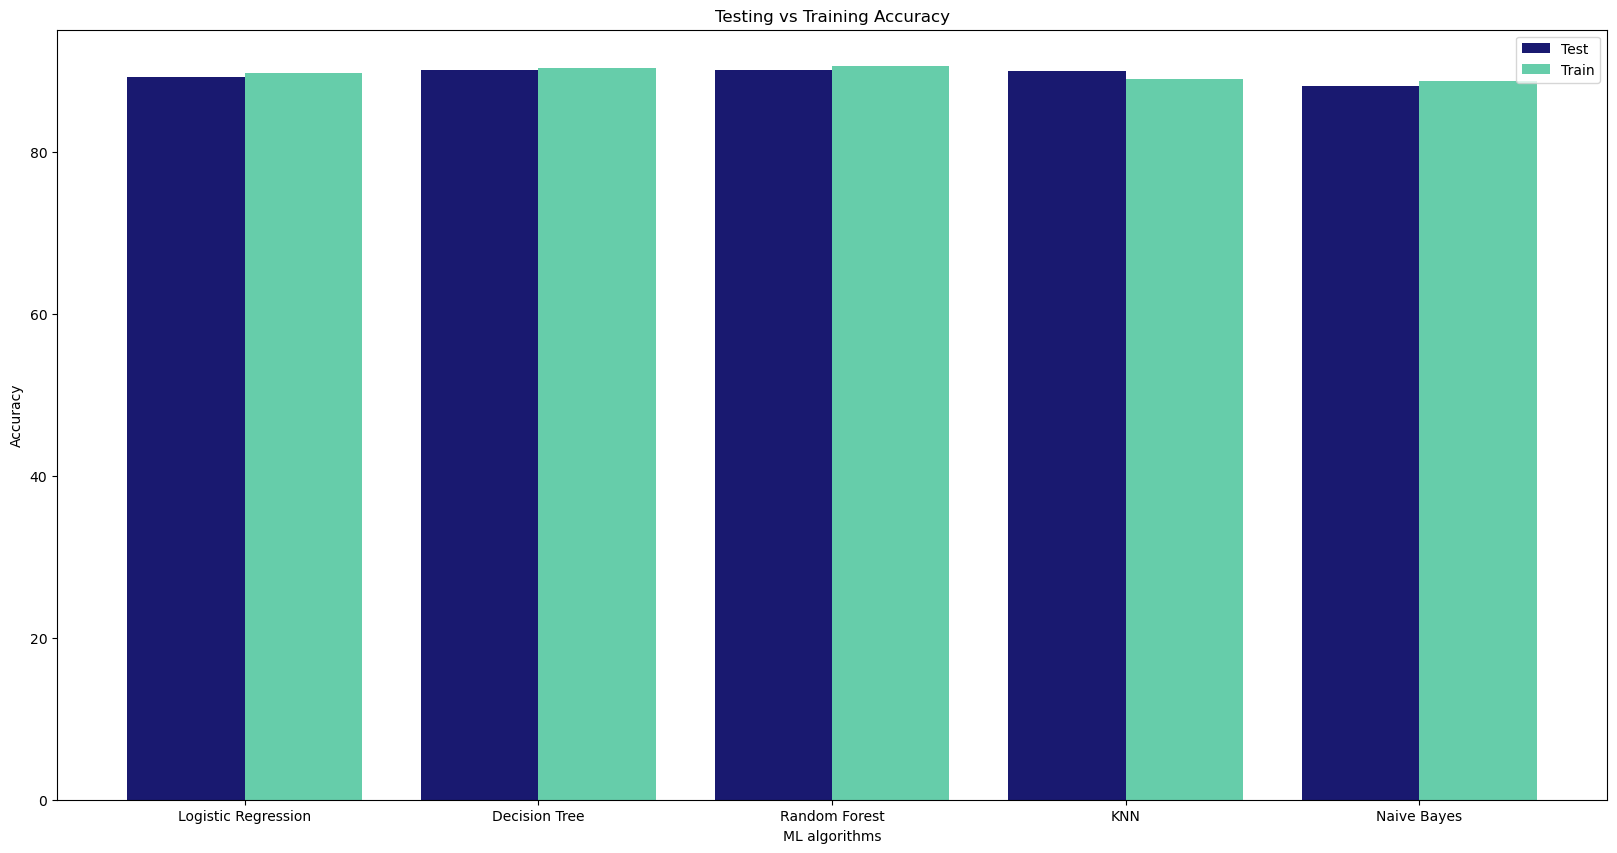

In [132]:
label = ['Logistic Regression','Decision Tree','Random Forest', 'KNN', 'Naive Bayes']
Test = [89.20,90.04,90.11,89.88,88.14]
Train = [89.70,90.33,90.51,88.94,88.68]

f, ax = plt.subplots(figsize=(20,10)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.savefig('train vs test.png')
plt.show()

### Stacking
 - First Layer Estimators:
     1. Decision Tree
     2. Naive Bayes
     3. KNN
     4. Random Forest
 - Meta Classifier
     1. Logistic Regression

In [133]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [134]:
from mlxtend.classifier import StackingClassifier
clf_stack = StackingClassifier(classifiers =[rfc,knn,classifier,dtree], meta_classifier = lreg, use_probas = True, use_features_in_secondary = True)

In [135]:
model_stack = clf_stack.fit(x_train, y_train)
pred_stack = model_stack.predict(x_test)
accuracy_score(y_test, pred_stack)

0.8957964601769911

In [136]:
print(classification_report(y_test,pred_stack))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8031
           1       0.55      0.37      0.44      1009

    accuracy                           0.90      9040
   macro avg       0.74      0.66      0.69      9040
weighted avg       0.88      0.90      0.89      9040



## Comparision

In [137]:
print('Logistic Regression score: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
print('Decision Tree score: {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('Random Forest score: {:.2f}'.format(accuracy_score(y_test, rf_pred)))
print('KNN score: {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('Naive Bayes score: {:.2f}'.format(accuracy_score(y_test, nb_pred)))

Logistic Regression score: 0.90
Decision Tree score: 0.90
Random Forest score: 0.91
KNN score: 0.89
Naive Bayes score: 0.89


## Exporting

In [138]:
import pickle
with open('logisticregression.pickle','wb') as f:
    pickle.dump(lreg,f)

In [139]:
import pickle
with open('decisiontree.pickle','wb') as f:
    pickle.dump(dtree,f)

In [140]:
import pickle
with open('randomforest.pickle','wb') as f:
    pickle.dump(rfc,f)

In [141]:
import pickle
with open('knn.pickle','wb') as f:
    pickle.dump(knn,f)

In [142]:
import pickle
with open('nb.pickle','wb') as f:
    pickle.dump(clf_stack,f)

In [143]:
import pickle
with open('stacked.pickle','wb') as f:
    pickle.dump(classifier,f)

In [144]:
import json
columns={
    'data_columns' : [col.lower() for col in train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

--------------------------------------------------------------------------------------------------------------

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45200 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45200 non-null  int32
 1   job       45200 non-null  int32
 2   default   45200 non-null  int64
 3   balance   45200 non-null  int32
 4   housing   45200 non-null  int64
 5   month     45200 non-null  int32
 6   duration  45200 non-null  int32
 7   poutcome  45200 non-null  int32
dtypes: int32(6), int64(2)
memory usage: 2.1 MB


In [146]:
train.head(10)

,age,job,default,balance,housing,month,duration,poutcome
0,3,6,0,3,1,1,261,1
1,1,2,0,1,1,1,151,1
2,1,1,0,1,1,1,76,1
3,1,1,0,2,1,1,92,1
4,1,5,0,1,0,1,198,1
5,1,6,0,1,1,1,139,1
6,1,6,0,1,1,1,217,1
10,1,3,0,1,1,1,222,1
11,1,3,0,1,1,1,137,1
12,1,2,0,1,1,1,517,1


In [147]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: subscribed, dtype: int64

In [148]:
data = np.array([[3,6,0,3,1,1,261,1]])
prediction = lreg.predict(data)
print(prediction)

[0]
